In [1]:
from specim_test.specim.specfuncs import spec2d, spec1d

In [2]:
#infile1 = '../galaxy_spectra/spec2d_r201121_0030-J0040+2555_LRISr_2020Nov21T045325.037.fits'
#infile2 = '../galaxy_spectra/spec2d_r201121_0031-J0040+2555_LRISr_2020Nov21T051705.971.fits'
infile = '../galaxy_spectra/spec2d_r201121_0043-J0805+6919_LRISr_2020Nov21T152211.856.fits'

In [3]:
spec1 = spec2d.Spec2d(infile, hext=12, xtrim=[60, 170]) #  xtrim=[40, 500]


Loading file ../galaxy_spectra/spec2d_r201121_0043-J0805+6919_LRISr_2020Nov21T152211.856.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/spec2d_r201121_0043-J0805+6919_LRISr_2020Nov21T152211.856.fits (HDU=12)
The input dataset was trimmed
 xrange: 60:171.  yrange: 0:4096
Final data dimensions (x y): 111 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 111



In [4]:
spec1.set_dispaxis('y')


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096




### To subtract sky from original data here we are using pypeit generated sky model. Also using 'szap' function in spec2d.py cosmic ray rejection procedure is taken care of. Then this sky subtracted and cosmic ray rejected data are being used for 1d spectra extraction.


pypeit generated sky model will be used for sky subtraction


From this point sky subtracted data will be used
 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00


From now cosmic ray rejected data will be used


Cutout image center (x, y): (2048, 55)
Cutout image size (x y): 4096x111

Calculating display limits
--------------------------
 Clipped mean: 79.457397
 Clipped rms:  49.990833
 fmin (mean -   1 sigma):  29.466564
 fmax (mean +  10 sigma):  579.365730

Cutout image center (x, y): (2048, 55)
Cutout image size (x y): 4096x111

Calculating display limits
--------------------------
 Clipped mean: 4.471252
 Clipped rms:  12.399763
 fmin (mean -   1 sigma):  -7.928511
 fmax (mean +  10 sigma):  128.468883

Cutout image center (x, y): (2048, 55)
Cutout image size (x y): 4096x111

Calculating display limits
--------------------------
 Clipped mean: 4.468165
 Clipped rms:  12.327739
 fmin (mean -   1 sigma):  -7.85957

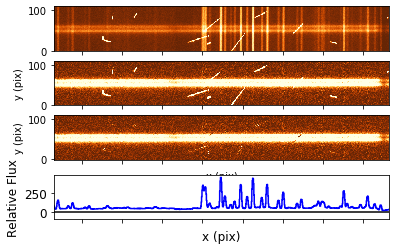

<Figure size 432x288 with 0 Axes>

In [5]:
spec1.display_spec(use_skymod=True, doszap=True)

Dispersion : 0.800000
Found 110 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled in place of the coordinateds whcih rectify the tilted wave image


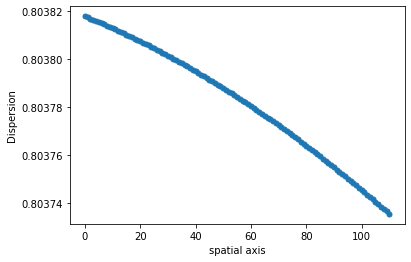

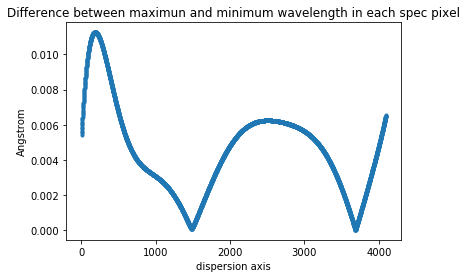

In [6]:
spec1.do_waverect(doplot=True)

Profile max value (before normalization) 205.189499


<IPython.core.display.Javascript object>


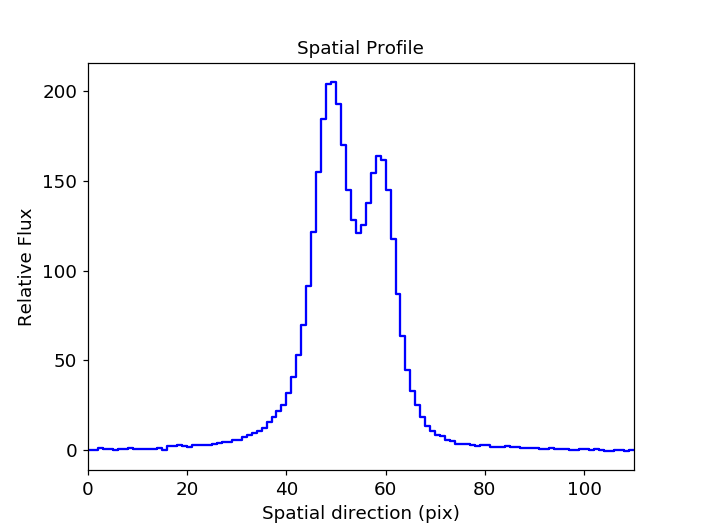

In [7]:
%matplotlib notebook
profile = spec1.spatial_profile(pixrange=[1400,2600])

In [ ]:
## These are the values we used as initial guess for profiles

# if two Gaussian  
# co = 2
# gauss 1 (primary peak) = 205, 48, 3
# gauss 2 (secondary peak) = 164, 59, 3

# primary peak = 205, 48, 3, 4.765 (for Moffat profile) or 560, 75, 3 (if gaussian profile is used)

### Here we are going to use two Gaussian profile and one Moffat profile to fit the total profile.


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : 2

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 205, 48, 3, 4.765

amplitude=205.000000, x_0=48.000000, gamma=3.000000, alpha=4.765000

Parameters of Moffat profile 2 : 64, 59, 3, 4.765

amplitude=64.000000, x_0=59.000000, gamma=3.000000, alpha=4.765000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=0.33007748)>

    [1]: <Moffat1D(amplitude=201.06370181, x_0=49.55220648, gamma=5.22774762, alpha=1.4081482)>

    [2]: <Moffat1D(amplitude=142.20636231, x_0=59.6

<IPython.core.display.Javascript object>


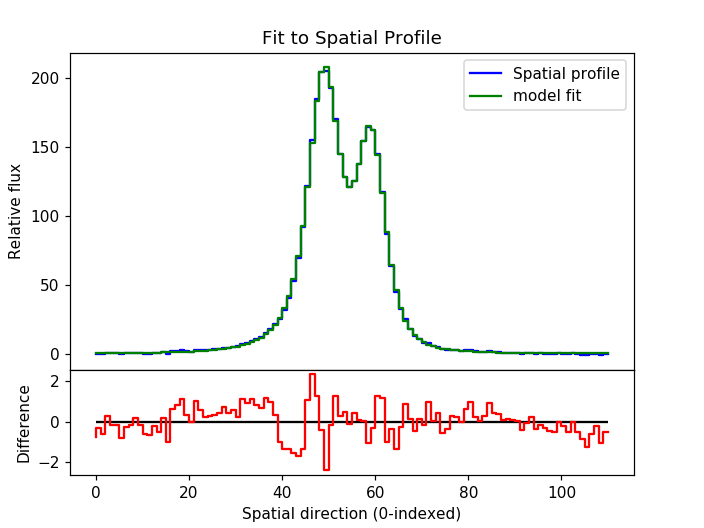

<IPython.core.display.Javascript object>


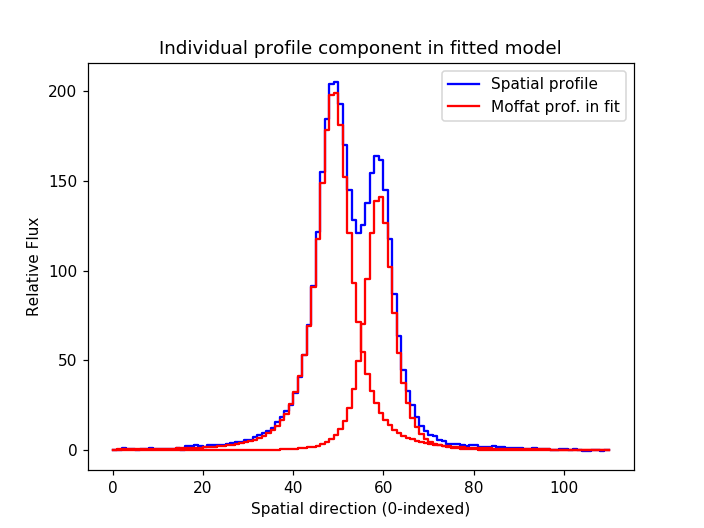


Do you want to start over ? : type yes/no
no


In [8]:
mod = spec1.initial_model()

### Need to calculate the distance between peaks using image of the system.

In [9]:
# impose constraints
def tie_gamma(model):
     
    return model.gamma_2
    
def tie_alpha(model):
     
    return model.alpha_2                   
                    
def tie_pos1_gauss(model):
    return model.mean_2 - 10.68

def tie_pos1_moffat(model):
     return model.x_0_2 - 10.68
            
def tie_pos2_gauss(model):
     return model.mean_1 + 10.207
    
def tie_pos2_moffat(model):
    return model.x_0_1 + 10.207

# for two Gaussian and one Moffat  
#mod[1].mean.tied = tie_pos1_moffat 
#mod[2].mean.tied = tie_pos2_moffat 

# for two Gaussian profile
#mod[2].mean.tied = tie_pos2_gauss 
#mod[3].mean.tied = tie_pos2_gauss 

# for two Moffat profile
mod[2].x_0.tied = tie_pos2_moffat
#mod[3].x_0.tied = tie_pos2_moffat

#mod[3].x_0.tied = tie_pos
#mod[1].alpha.tied = tie_alpha
#mod[3].alpha.tied = tie_alpha

#mod[1].gamma.tied = tie_gamma
#mod[3].gamma.tied = tie_gamma


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=0.33007748)>

    [1]: <Moffat1D(amplitude=201.06370181, x_0=49.55220648, gamma=5.22774762, alpha=1.4081482)>

    [2]: <Moffat1D(amplitude=142.20636231, x_0=59.62877689, gamma=5.82646083, alpha=2.15930045)>
Parameters:
           c0_0           amplitude_1     ...      gamma_2           alpha_2     
    ------------------ ------------------ ... ----------------- -----------------
    0.3300774809347656 201.06370181434244 ... 5.826460832743266 2.159300449346656

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=0.40005275)>

    [1]: <Moffat1D(amplitude=200.77285163, x_0=49.50843273, gamma=5.40800197, alpha=1.46839644)>

    [2]: <Moffat1D(amplitude=142.507512

<IPython.core.display.Javascript object>


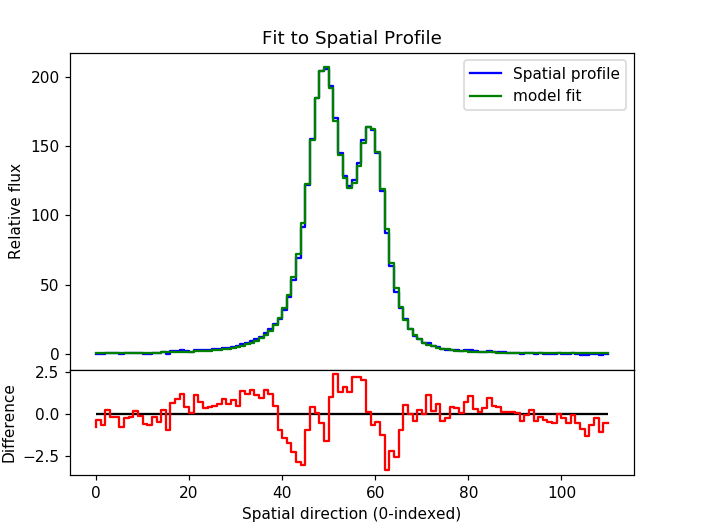

<IPython.core.display.Javascript object>


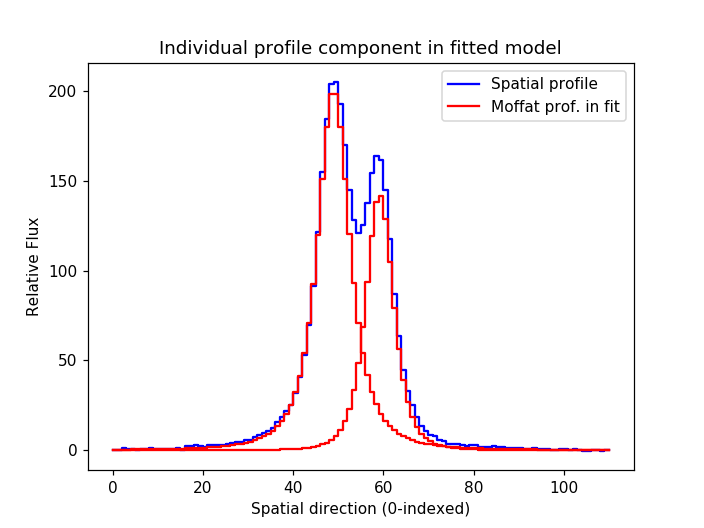

In [10]:
 mod_new = spec1.refined_model(mod)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 3 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2


<IPython.core.display.Javascript object>


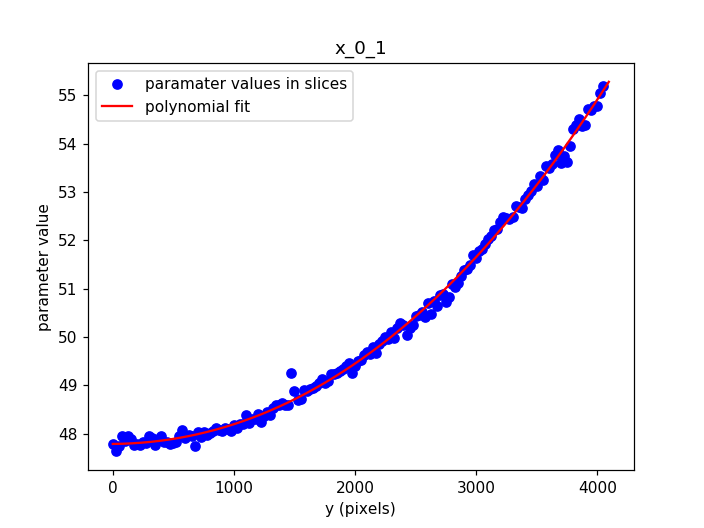

<IPython.core.display.Javascript object>


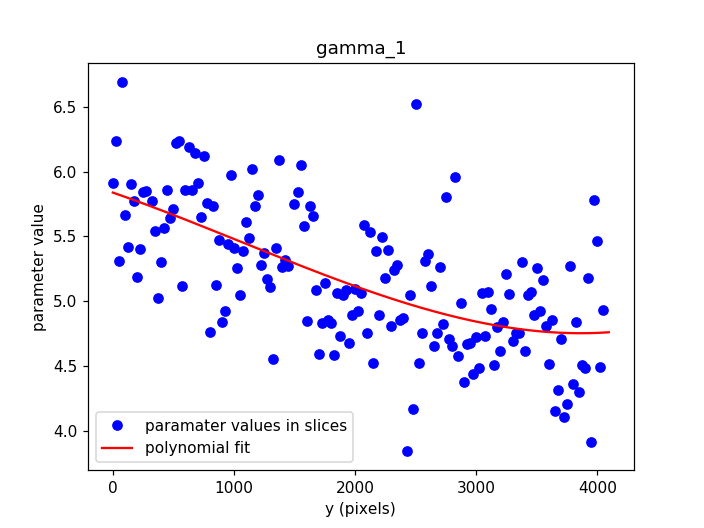

<IPython.core.display.Javascript object>


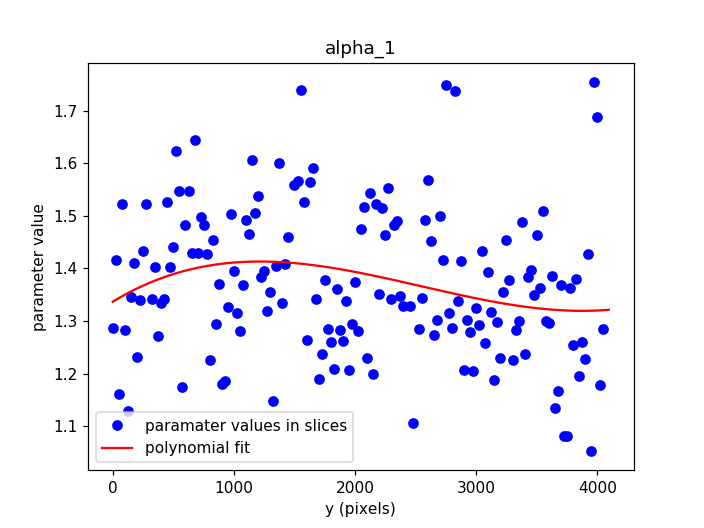

<IPython.core.display.Javascript object>


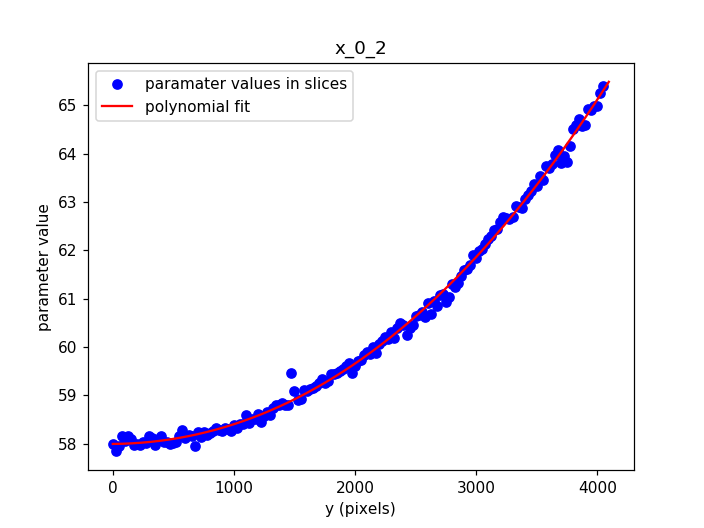

<IPython.core.display.Javascript object>


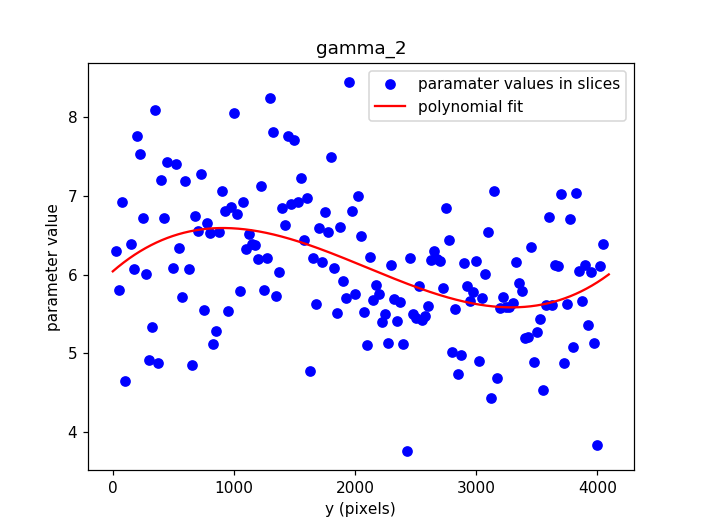

<IPython.core.display.Javascript object>


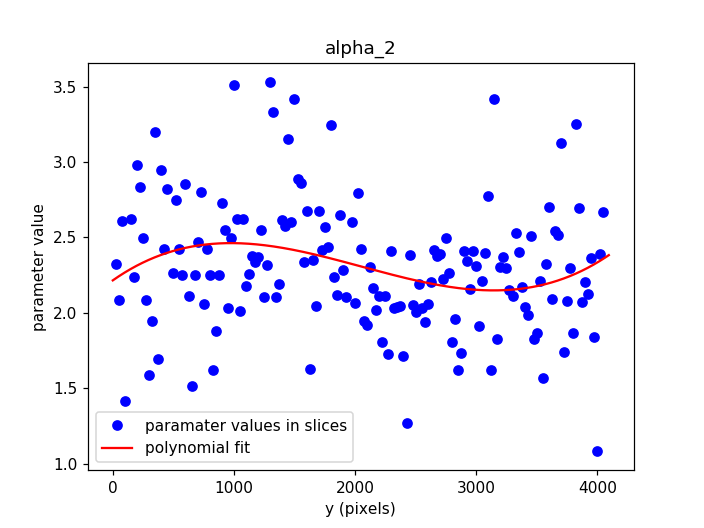

In [11]:
spec1.find_and_trace(mod_new, stepsize=25, fitorder={'stddev_1':3, 'stddev_2':3})
                    #fitrange=[200,4000])  

Fitting to 2 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5652.27
 Spectrum End:     8928.27
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5652.27
 Spectrum End:     8928.27
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Plotting the spectrum


<IPython.core.display.Javascript object>


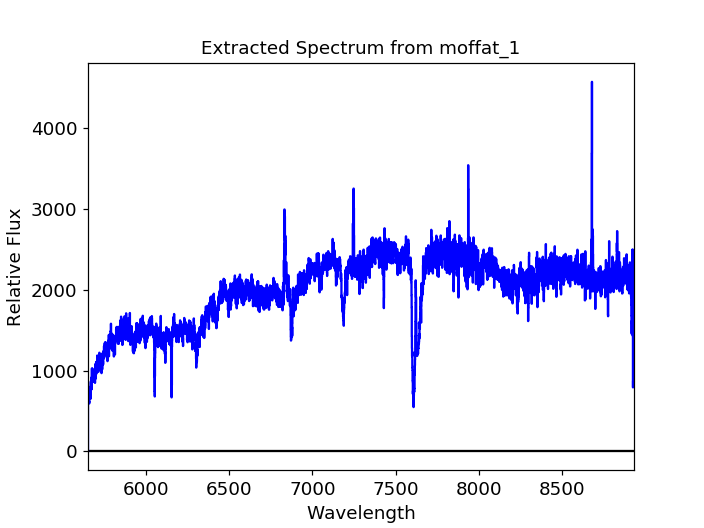

<IPython.core.display.Javascript object>


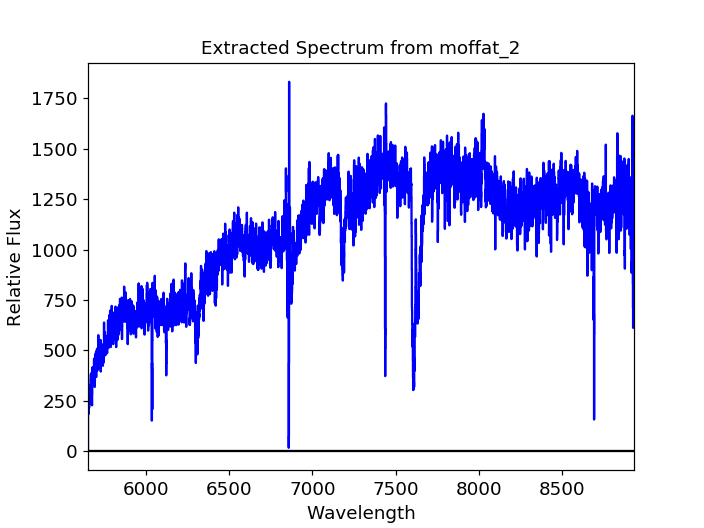

In [12]:
spec1.extract(method='modelfit')

### The following is the extracted and smoothed spectra for the primary peak.

Extracted Spectrum from moffat_1


<IPython.core.display.Javascript object>


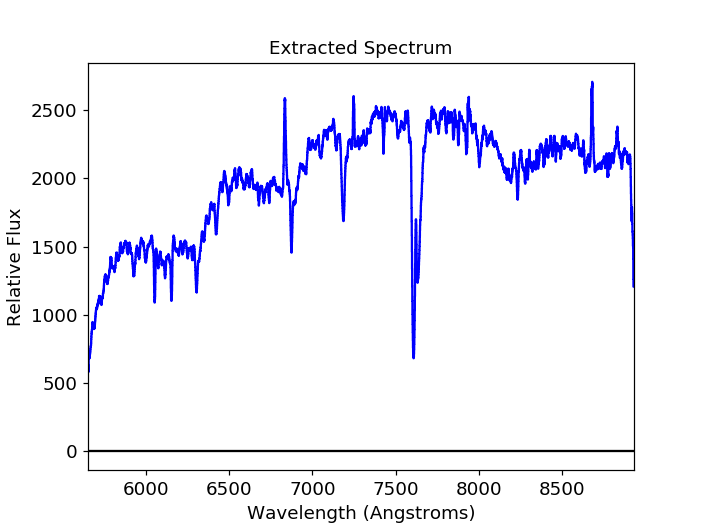

In [13]:
print(spec1.spectra[0][0])
spec1.spectra[0][1].smooth(11)

### In the above smoothed spectra I guess there is Mg b line at around 6304 A. The calculated redshift from this line is 0.218.

<IPython.core.display.Javascript object>


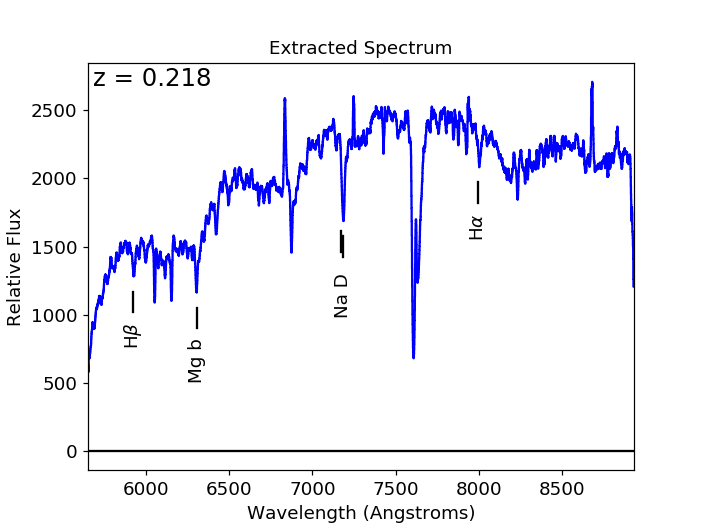


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-beta        4861.00       5920.70
Mg I (b)      5176.00       6304.37
Na I (D)      5889.95       7173.96
Na I (D)      5895.92       7181.23
H-alpha       6562.80       7993.49



In [14]:
spec1.spectra[0][1].smooth(11)
spec1.spectra[0][1].mark_lines('abs', z=0.218, usesmooth=True)
#spec1.spectra[0][1].mark_lines('em', z=0.218, usesmooth=True)
#spec1.spectra[0][1].mark_lines('strongem', z=0.561, usesmooth=True)

### The following extracted spectra is for secondary peak which looks similar to spectra for the primary peak.

Extracted Spectrum from moffat_2


<IPython.core.display.Javascript object>


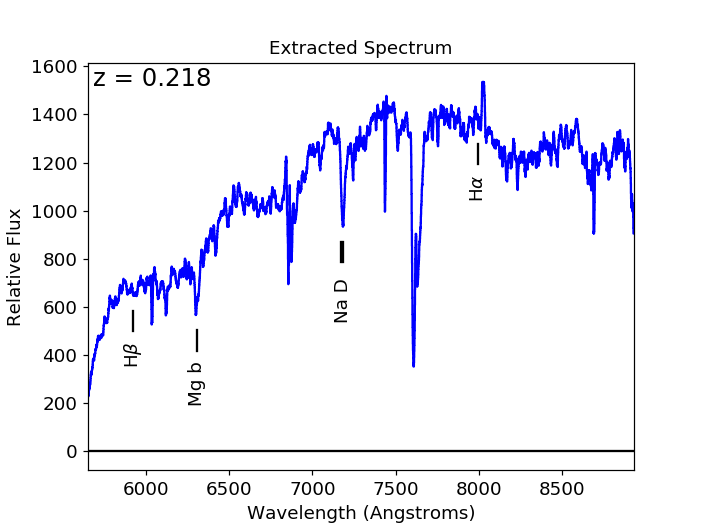


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-beta        4861.00       5920.70
Mg I (b)      5176.00       6304.37
Na I (D)      5889.95       7173.96
Na I (D)      5895.92       7181.23
H-alpha       6562.80       7993.49



In [15]:
print(spec1.spectra[1][0])
spec1.spectra[1][1].smooth(11)
spec1.spectra[1][1].mark_lines('abs', z=0.218, usesmooth=True)
#spec1.spectra[1][1].mark_lines('em', z=0.218, usesmooth=True)
#spec1.spectra[2][1].mark_lines('strongem', z=0.561, usesmooth=True)

In [ ]:
#spec1.spectra[1][1].save('spec1d_J0040+2555_LRISr_2020Nov21T045325.037_modelfit_three_gaussian.fits', outformat='fits')